# MATH 215 Python Assignment 4

## Instructions

* Enter your solutions in cells with `YOUR CODE HERE` (all other cells are ignored by the autograder)
* Run the tests to verify your work (and note some cells contain hidden tests)
* Hidden tests only run during autograding
* Do not import any pacakges (other than the standard packages in the cell below)
* See [Python for UBC Math](https://ubcmath.github.io/python/) for instructions and examples
* Submit the completed notebook to Canvas (download `.ipynb` file to your machine and then upload to Canvas)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Eigenvalues and Eigenvectors

The function `scipy.linalg.eig` computes the eigenvalues and eigenvectors of a matrix $A$. The function returns an array `evals` of eigenvalues and a matrix `evecs` of eigenvectors such that column `evecs[:,i]` corresponds to the eigenvalue `evals[i]`.

For example, consider the matrix

$$
A = \begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix}
$$

The characteristic polynomial is

$$
p(x) = x^2 - 2x + 3 = (x - 3)(x + 1)
$$

The eigenvalues are $\lambda_0 = 3$ and $\lambda_1 = -1$ with corresponding (unit) eigenvectors

$$
\mathbf{v}_0 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}
\hspace{20mm}
\mathbf{v}_1 = \frac{1}{\sqrt{2}} \begin{bmatrix} -1 \\ 1 \end{bmatrix}
$$

Compute the eigenvalues and eigenvectors using `scipy.linalg.eig`:

In [2]:
A = np.array([[1,2],[2,1]])
evals,evecs = la.eig(A)

In [3]:
evals

array([ 3.+0.j, -1.+0.j])

In [4]:
evecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Note that eigenvalues are always returned as complex numbers even if the values are (theoretically) real numbers. We can use the function `np.real` to select the real part of an array.

In [5]:
np.real(evals)

array([ 3., -1.])

## Solutions of First Order Linear Systems

Let $A$ be a $d \times d$ matrix with **distinct eigenvalues**. The general solution of the $d$-dimensional first order linear homogeneous system of differential equations $\mathbf{x}' = A \mathbf{x}$ is given by

$$
\mathbf{x}(t) = c_0 e^{\lambda_0 t} \mathbf{v}_0 + c_1 e^{\lambda_1 t} \mathbf{v}_1 + \cdots + c_{d-1} e^{\lambda_{d-1} t} \mathbf{v}_{d-1}
$$

where:

* $\lambda_0,\lambda_1,\dots,\lambda_{d-1}$ are the eigenvalues of $A$
* $\mathbf{v}_0,\mathbf{v}_1,\dots,\mathbf{v}_{d-1}$ are the corresponding eigenvectors of $A$
* $c_0,c_1,\dots,c_{d-1}$ are coefficients which are determined by the initial conditions $\mathbf{x}(0)$

The function `odeA` defined below takes input parameters `A`, `x0` and `t` where:

* `A` is a square matrix of size $d \times d$
* `x0` is a vector of length $d$ representing the initial values $\mathbf{x}(t_0) = \mathbf{x}_0$
* `t` is a vector of $t$ values starting with $t_0$

The function `odeA` returns a matrix `x` such that:

* the number of rows of `x` is equal to the length of `t`
* the number of columns of `x` is equal to the dimension $d$ of the system
* the first row `x[0,:]` is the vector of initial values $\mathbf{x}(t_0) = \mathbf{x}_0$
* the row `x[n,:]` at index $n$ is the vector of approximations of the solution $\mathbf{x}(t_n)$ at time $t_n$
* the value $t_n$ is the entry `t[n]` at index $n$ in the input array `t`
* the column `x[:,i]` is the vector of approximations of the function $x_i(t)$

**Important**: The funciton `odeA` only works for real matrices with **distinct** eigenvalues. We need to do something different for repeated eigenvalues.

In [6]:
def odeA(A,x0,t):
    D,V = la.eig(A)
    c = la.solve(V,x0)
    C = np.diag(c)
    x = (V@C@np.exp(np.outer(D,t))).T.real
    return x

For example, let compute the solution of the system $\mathbf{x}' = A \mathbf{x}$ where

$$
A = \begin{bmatrix} -4 & -5 \\ 5 & 3 \end{bmatrix}
$$

and $\mathbf{x}(0) = [1,1]$. Compute the solution for $t \in [0,10]$ using $201$ values.

In [7]:
A = np.array([[-4.,-5],[5.,3.]])
x0 = np.array([1.,1.])
t = np.linspace(0,10,201)
x = odeA(A,x0,t)

Check the size of `x`.

In [8]:
x.shape

(201, 2)

Plot the columns of `x` with respect to `t`.

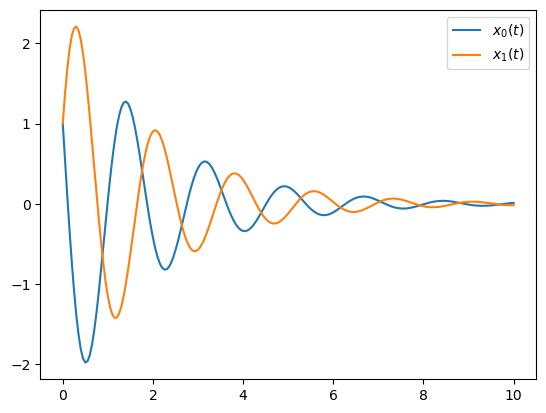

In [9]:
plt.plot(t,x)
plt.legend(['$x_0(t)$','$x_1(t)$'])
plt.show()

Plot the trajectory $(x_0(t),x_1(t))$:

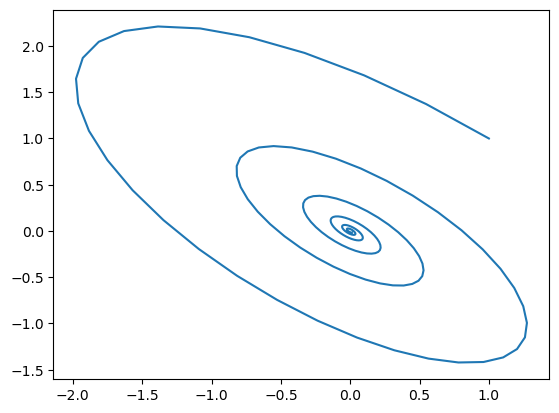

In [10]:
plt.plot(x[:,0],x[:,1])
plt.show()

## Problem 1 (5 marks)

Consider the linear system of differential equations $\mathbf{x}' = A \mathbf{x}$ where

$$
A = \left[ \begin{array}{rrr} -1 & 1 & 0 \\ 1 & 1 & 1 \\ 0 & 1 & 1 \end{array} \right]
$$

**Part A.** The matrix $A$ is symmetric and therefore the eigenvalues are real. Compute the eigenvalues of $A$, select the real part and save the **largest** eigenvalue as `lambda1a`. We are expecting the value accurate to at least 8 decimal places.

In [11]:
# YOUR CODE HERE
A = np.array([[-1, 1, 0],
              [1, 1, 1],
              [0, 1, 1]])

eigenvalues = np.linalg.eigvals(A)

lambda1a = np.max(np.real(eigenvalues))

In [12]:
# Test 1: Check if lambda1a is a positive number. (1 mark)
assert lambda1a > 0 , "lambda1a should be positive."
print("Test 1: Success!")

Test 1: Success!


In [13]:
## Test 2: Check if lambda1a is approximately 2.2. (1 mark)
assert np.round(lambda1a,1) == 2.2 , "lambda1a should be approximately 2.2."
print("Test 2: Success!")

Test 2: Success!


In [14]:
# Test 3: Check if lambda1a is the correct value. This cell contains hidden tests. (1 mark)

**Part B.** Determine whether the following statement is **True** or **False**: There exists a (nonzero) initial value vector $\mathbf{x}(0)$ such that the corresponding solution $\mathbf{x}(t)$ of the system $\mathbf{x}' = A \mathbf{x}$ (with matrix $A$ as in part (a) above) satisfies $\| \mathbf{x}(t) \| \to 0$ as $t \to \infty$. Enter your response as either `True` or `False` and save as `observation1b`.

In [15]:
# YOUR CODE HERE
observation1b = False

In [16]:
# Test 1: Check if observation1b is True or False. (1 mark)
assert isinstance(observation1b,bool) , "observation1b should be True or False."
print("Test 1: Success!")

Test 1: Success!


In [17]:
# Test 2: Check if observation1b is the correct value. This cell contains hidden tests. (1 mark)

## Problem 2 (4 marks)

Use the function `odeA` (defined above) to compute the solution of the system $\mathbf{x}' = A\mathbf{x}$ for the matrix

$$
A = \begin{bmatrix} -1 & -1 \\ 1 & -1 \end{bmatrix}
$$

with initial condition $\mathbf{x}(0) = (1,-1)$. Compute the solution for $t \in [0,4]$ and use at least 100 $t$ values. Save the result as `x2`.

In [18]:
# YOUR CODE HERE
A = np.array([[-1, -1],
              [1, -1]])

t = np.linspace(0, 4, 100)

x0 = np.array([1, -1])

x2 = odeA(A, x0, t)

In [19]:
# Test 1: Check if x2 is a NumPy array. (1 mark)
assert isinstance(x2,np.ndarray) , "x2 should be a NumPy array."
print("Test 1: Success!")

Test 1: Success!


In [20]:
# Test 2: Check if x2 is has 2 columns and at least 100 rows. (1 mark)
assert x2.shape[0] >= 100 , "x2 should have at least 100 rows."
assert x2.shape[1] == 2 , "x2 should have 2 columns."
print("Test 2: Success!")

Test 2: Success!


In [21]:
# Test 3: Check if x2 has the correct initial values and last values. (1 mark)
assert np.allclose(x2[0,:],[1,-1])  , "First row of x2 should be [1,-1]."
assert np.allclose(x2[-1,:],[-0.02583322,-0.00188942],rtol=0,atol=0.1)  , "Last row of x2 should be approximately [-0.026, -0.002]."
print("Test 3: Success!")

Test 3: Success!


In [22]:
# Test 4: Check if x2 has the correct values. This cell contains hidden tests. (1 mark)

Plot with some of the exact values to verify your solution is correct.

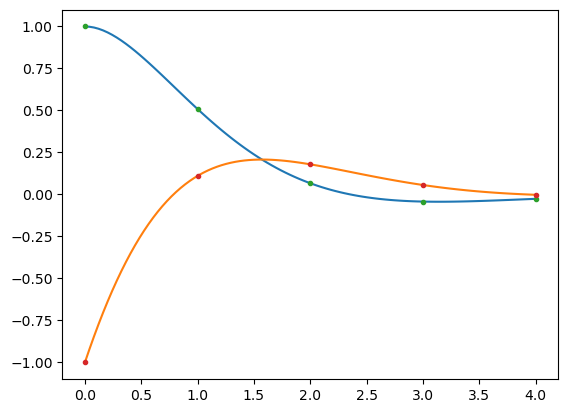

In [23]:
plt.plot(t,x2)
plt.plot([0,1,2,3,4],[1.,0.50832599,0.06674067,-0.04226287,-0.02583322],'.')
plt.plot([0,1,2,3,4],[-1.,0.11079377,0.17937937,0.05631478,-0.00188942],'.')
plt.show()

And plot the trajectory with some of the exact values to verify your solution is correct.

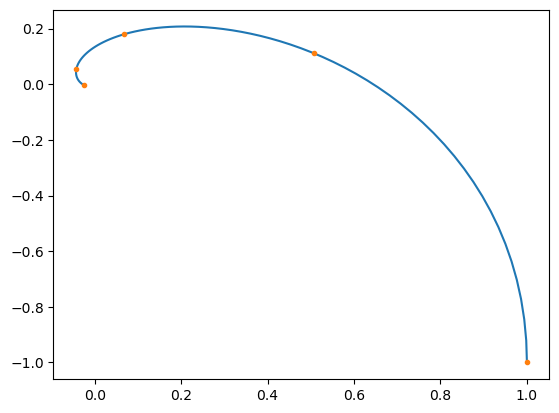

In [24]:
plt.plot(x2[:,0],x2[:,1])
plt.plot([1.,0.50832599,0.06674067,-0.04226287,-0.02583322],[-1.,0.11079377,0.17937937,0.05631478,-0.00188942],'.')
plt.show()

## Problem 3 (4 marks)

Consider a system of 3 tanks containing salt water solution such that each tank contains $V$ litres of solution and each flows into the others at a rate $Q$ litres per minute. Let $M_1(t)$, $M_2(t)$, and $M_3(t)$ be the mass of salt in each tank at time $t$. Applying the principle of conservation of mass we find the system is described by equations

$$
\begin{aligned}[t]
\frac{dM_1}{dt} &= \frac{M_2}{V} Q + \frac{M_3}{V} Q - 2\frac{M_1}{V} Q \\
\frac{dM_2}{dt} &= \frac{M_1}{V} Q + \frac{M_3}{V} Q - 2\frac{M_2}{V} Q \\
\frac{dM_3}{dt} &= \frac{M_1}{V} Q + \frac{M_2}{V} Q - 2\frac{M_3}{V} Q
\end{aligned}
$$

Use the function `odeA` to compute the solution over the interval $0 \leq t \leq 40$ for $Q = 50$, $V = 1000$ and initial values $M_1(0) = 0$, $M_2(0) = 500$, and $M_3(0) = 100$. Use at least 4000 $t$ values. Save the solution as `M3`.

The first column `M3[:,0]` corresponds to $M_1(t)$, the second column `M3[:,1]` corresponds to $M_2(t)$ and the third column `M3[:,2]` corresponds to $M_3(t)$.

In [25]:
# YOUR CODE HERE
Q = 50
V = 1000
k = Q / V

A = k * np.array([[-2, 1, 1],
                  [1, -2, 1],
                  [1, 1, -2]])

M0 = np.array([0, 500, 100])

t = np.linspace(0, 40, 4000)

M3 = odeA(A, M0, t)

In [26]:
# Test 1: Check if M3 is a NumPy array. (1 mark)
assert isinstance(M3,np.ndarray) , "M3 should be a NumPy array."
print("Test 1: Success!")

Test 1: Success!


In [27]:
# Test 2: Check if M3 is has 3 columns and at least 4000 rows. (1 mark)
assert M3.shape[0] >= 4000 , "M3 should have at least 4000 rows."
assert M3.shape[1] == 3 , "M3 should have 3 columns."
print("Test 2: Success!")

Test 2: Success!


In [28]:
# Test 3: Check if M3 has the correct initial values and last values. (1 mark)
assert np.allclose(M3[0,:],[0,500,100]) , "First row of M3 should be [0,500,100]."
assert np.allclose(M3[-1,:],[199.50424956, 200.74362565, 199.75212478],rtol=0,atol=0.1) , "Last row of M3 should be approximately [200,200,200]."
print("Test 3: Success!")

Test 3: Success!


In [29]:
# Test 4: Check if M3 has the correct values. This cell contains hidden tests. (1 mark)

*Reflection*: The symmetry of the tank system implies that the salt concentration in each tank should converge to the same value as $t \to \infty$. In particular, $M_1(t)$, $M_2(t)$ and $M_3(t)$ should all converge to

$$
\frac{M_1(0) + M_2(0) + M_3(0)}{3}
$$

as $t \to \infty$. Does this statement agree with the figure below?

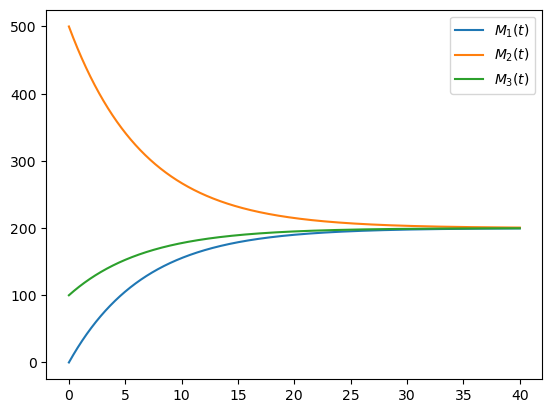

In [30]:
plt.plot(t,M3)
plt.legend(['$M_1(t)$','$M_2(t)$','$M_3(t)$'])
plt.show()

## Laplace Transforms

The Laplace transform of a function $f(t)$, denoted $\mathcal{L}\{f(t)\}$ or $F(s)$, is defined as $$\mathcal{L}\{f(t)\} = \int_0^{\infty} e^{-st}f(t)dt.$$
The Laplace transform can be used to solve ODEs by transforming the differential equation into an algebraic equation, which can be more easily and directly solved. See [Paul's Online Notes: Table Of Laplace Transforms](https://tutorial.math.lamar.edu/classes/de/laplace_table.aspx) for a list of common transforms.

### Unit Step Functions
A useful function in Laplace transforms is the unit step funcction

$$
u_c(t) = \left\{ \begin{array}. 0, & t<c \\ 1, & t\geq c \end{array} \right.
$$

The function `u` below takes `t` and `c` as input and returns 0.0 if $t<0$ or 1.0 if $t\geq c$.

In [31]:
u = lambda t,c: np.heaviside(t - c,1)

Step functions can be thought of as switches: adding a step functions turns on a switch and subtracting a step function turns off a switch. The function $u_2(t)-u_4(t)$ represents a switch that starts off at $t=0$, is turned on at $t=2$ and is turned off again at $t=4$. The infinite sum $\sum_{n=0}^{\infty} (-1)^n u_n(t)$ is a switch that turns on at $t=0$, then turns off again at every odd integer and turns on again at every even integer.

Below are example uses of the function `u` and plots of those functions.

_Note that although we often plot step functions with vertical lines connecting each "step", the function is not actually continuous and does not take on any of the values along the vertical connecting lines. This means that each of the functions plotted below is only ever 0 or 1 and never any number inbetween. It is simpler in Python to plot the steps this way, and we sometimes do this when plotting by hand as well. Try changing `plt.plot` to `plt.scatter` in the code below to see the step functions without the vertical lines._

$u_4(t)$, a switch that turns on at $t=4$ and stays on

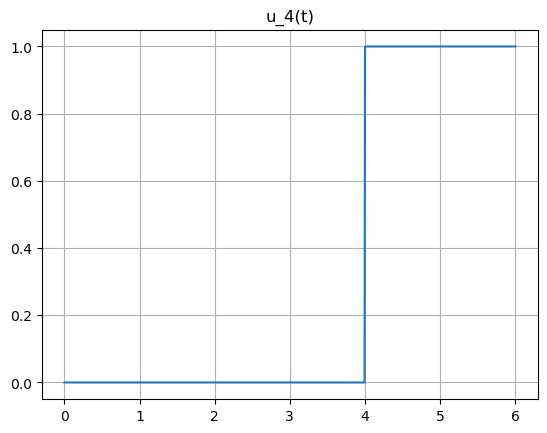

In [32]:
t_sample = np.linspace(0,6,1000)
plt.plot(t_sample,u(t_sample,4))
plt.title("u_4(t)")
plt.grid(True)

`u_onoff`: $u_1(t)-u_3(t)$, a switch that turns on at $t=1$ and turns off at $t=3$

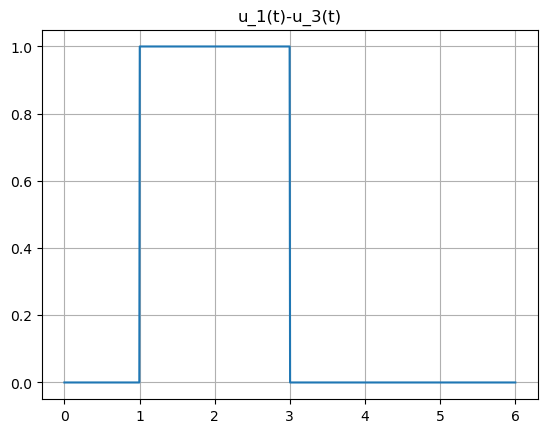

In [33]:
u_onoff = lambda t: u(t,1) - u(t,3)

plt.plot(t_sample,u_onoff(t_sample))
plt.title("u_1(t)-u_3(t)")
plt.grid(True)

`u_flicker`: $\sum_{n=0}^{5} (-1)^n u_n(t)$, a switch that turns on and off 3 times

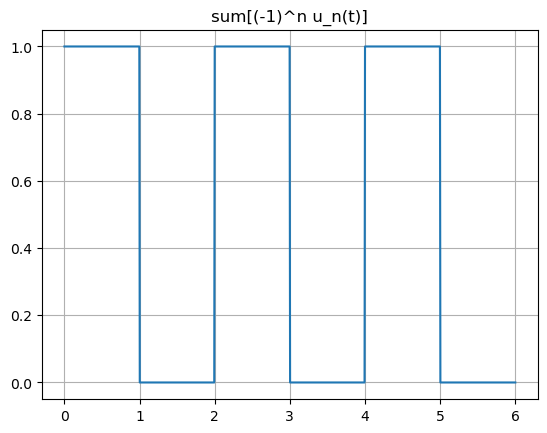

In [34]:
u_flicker = lambda t: sum([(-1)**n*u(t,n) for n in [0,1,2,3,4,5]])

plt.plot(t_sample,u_flicker(t_sample))
plt.title("sum[(-1)^n u_n(t)]")
plt.grid(True)

plt.show()

## Problem 4 (3 marks)

Consider the following ODE for the current, $i(t)$, in a circuit with a resistor, an inductor, a switch and an applied voltage, $v_s(t)$. 
$$ 2i(t) + 0.5i'(t) = v_s(t). $$

At $t<0$, the switch is off and at $t=0$ the switch is turned on, so $i(0)=0$. We want to find $i(t)$ after the switch is turned on. For this problem, we will use applied voltage $v_{s}(t)=10+20\sum_{n=1}^{N}(-1)^n u_{n/4}(t)$. This $v_{s}(t)$ is a square wave with period 0.5 and amplitude 10. For the purposes of this assignment, we will stop the sum at $N=4$.

Let's start by plotting $v_{s}(t)$ on the interval $0\leq t \leq 1$.

In [ ]:
t4 = np.linspace(0,1,1000)

vs4 = lambda t: 10+20*sum([(-1)**n*u(t,n/4) for n in [1,2,3,4]])

plt.plot(t4,vs4(t4))
plt.grid(True)
plt.show()

Apply the Laplace transform to the ODE and solve for $I(s) = \mathcal{L}\{i(t)\}$. Save your solution as a function of `s` called `L4`. Then apply the inverse Laplace transform to your transformed solution to find the final exact solution, $i(t)$, to the ODE. Save your solution as a function of `t` called `i4`.

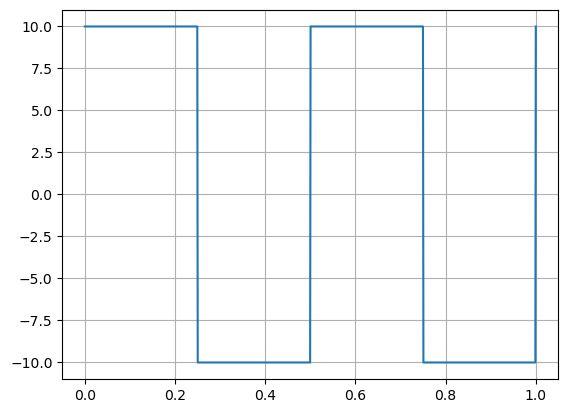

In [37]:
# YOUR CODE HERE
t4 = np.linspace(0, 1, 1000)

def vs4(t):
    return 10 + 20 * sum(((-1)**n) * (t >= n/4) for n in range(1, 5))

vs4_vals = np.array([vs4(t) for t in t4])
plt.plot(t4, vs4_vals)
plt.grid(True)
plt.show()

def L4(s):
    raise NotImplementedError("Laplace transform not implemented without sympy or signal tools.")

i_vals = np.zeros_like(t4)
dt = t4[1] - t4[0]

for k in range(1, len(t4)):
    v = vs4(t4[k-1])
    di_dt = 2 * (v - 2 * i_vals[k-1])
    i_vals[k] = i_vals[k-1] + dt * di_dt

def i4(t):
    return np.interp(t, t4, i_vals)

In [38]:
# Test 1: Check if L4 and i4 are defined as functions. (1 mark)
assert callable(L4) , "L4 should be a Python function."
assert callable(i4) , "i4 should be a Python function."
print("Problem 4 Test 1: Success!")

Problem 4 Test 1: Success!


In [39]:
# Test 2: Check if i4(0) is equal to 0. (1 mark)
assert np.allclose(i4(0),0) , "The value i4(0) should be 0."
print("Problem 4 Test 2: Success!")

Problem 4 Test 2: Success!


In [40]:
# Test 3: This cell contains hidden tests for grading. (2 marks)

Plot the exact solution and some test points to check your work.

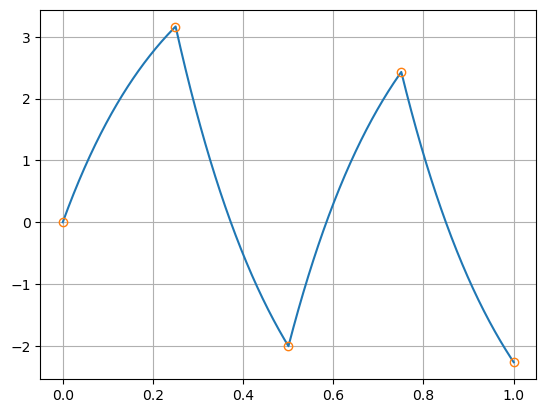

In [41]:
testPoints = np.array([0.,3.16060279, -1.997882, 2.42562308, -2.26826593])
plt.plot(t4,i4(t4))
plt.plot(np.linspace(0.,1.,5), testPoints,'o', fillstyle='none')
plt.grid(True)
plt.show()